
### 回归

In [2]:

## 导入基础库
import numpy as np
import torch 
import torch.nn as nn
import matplotlib.pyplot as plt
from IPython import display

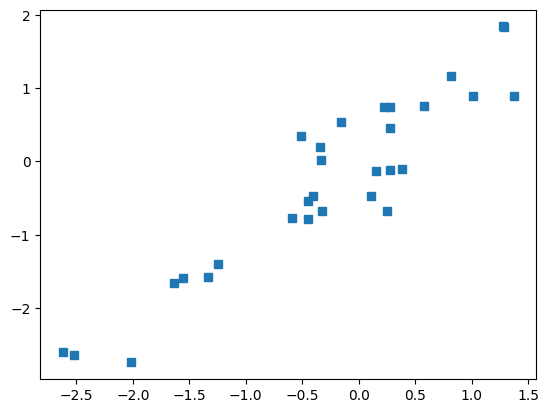

In [3]:

## 创建模拟数据

N =30
x = torch.randn(N,1)
y = x + torch.randn(N,1)/2

### 绘图
plt.plot(x,y,'s')
plt.show()



In [4]:
y

tensor([[-1.5952],
        [-2.6432],
        [-0.1032],
        [-0.7923],
        [-2.7458],
        [ 0.8952],
        [ 0.7413],
        [ 0.0166],
        [-0.1155],
        [-0.5332],
        [-0.4721],
        [-0.6740],
        [ 0.5453],
        [-1.4002],
        [ 0.1909],
        [ 0.4607],
        [-1.6576],
        [-0.1253],
        [ 0.8964],
        [ 1.8334],
        [-0.4697],
        [ 0.3511],
        [-0.7702],
        [-2.5993],
        [ 0.7606],
        [ 0.7377],
        [ 1.1733],
        [-1.5778],
        [-0.6723],
        [ 1.8440]])

In [5]:


# 构建模型

ANNReg = nn.Sequential(
    nn.Linear(1, 1), # 输入层
    nn.ReLU(),       # 激活函数
    nn.Linear(1,1)   # 输出层
)

ANNReg

Sequential(
  (0): Linear(in_features=1, out_features=1, bias=True)
  (1): ReLU()
  (2): Linear(in_features=1, out_features=1, bias=True)
)

In [6]:

### 训练模型

# 学习率
learningRate = .05

# 损失函数
lossFun = nn.MSELoss()

# 优化器 optimizer (the flavor of gradient descent to implement)
optimizer = torch.optim.SGD(ANNReg.parameters(),lr=learningRate)

# 训练
numepochs = 500
losses = torch.zeros(numepochs)

for epochi in range(numepochs):
    # forward pass
    yHat = ANNReg(x)
    loss = lossFun(yHat, y)
    losses[epochi] = loss

    # 反向传播
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

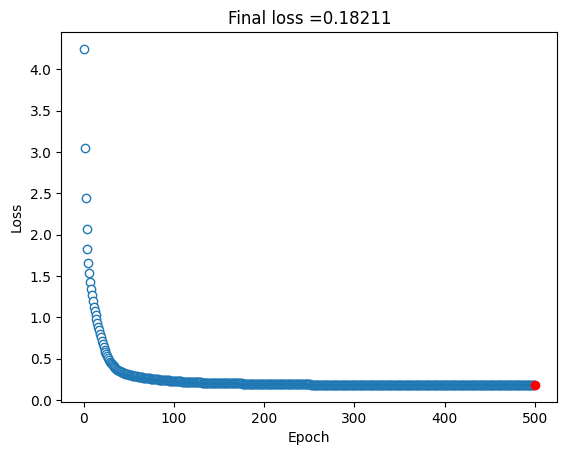

In [7]:

predictions= ANNReg(x)

### final loss (MSE) 均方误差
testloss =(predictions-y).pow(2).mean()
plt.plot(losses.detach(),'o',markerfacecolor='w',linewidth=.1)
plt.plot(numepochs,testloss.detach(),'ro')

plt.xlabel('Epoch')
plt.ylabel('Loss')

plt.title('Final loss =%g'%testloss.item())
plt.show()





In [8]:
predictions

tensor([[-1.6701],
        [-2.7164],
        [ 0.4293],
        [-0.4674],
        [-2.1676],
        [ 1.1128],
        [ 0.2533],
        [-0.3454],
        [ 0.3179],
        [-0.4744],
        [-0.4217],
        [-0.3366],
        [-0.1522],
        [-1.3334],
        [-0.3534],
        [ 0.3192],
        [-1.7574],
        [ 0.1814],
        [ 1.4032],
        [ 1.4032],
        [ 0.1328],
        [-0.5425],
        [-0.6194],
        [-2.8194],
        [ 0.6400],
        [ 0.3107],
        [ 0.8965],
        [-1.4321],
        [ 0.2890],
        [ 1.3974]], grad_fn=<AddmmBackward0>)